In [1]:
import numpy as np
import math
import scipy
from pprint import pprint

import os
import sys
sys.path.append('/home/sjyoo/repos/gh/MDTrAnal/lib')

from codar.oas.MDTrSampler import MDTrSampler, svd_wrapper

import matplotlib
import matplotlib.pyplot as plt

import parmed

In [2]:
%autosave 30

Autosaving every 30 seconds


In [3]:
 d = parmed.amber.AmberMdcrd('/home/sjyoo/data/tmp/7cz4_375/7cz4_md.crd', natom=2649, hasbox=True, mode='r')

In [4]:
(x,y,z) = d.coordinates.shape
t2 = d.coordinates.reshape((x, y*z),order='C')

In [5]:
print((x,y,z))

(3002, 2649, 3)


In [6]:
Ut, St, VTt = svd_wrapper(t2, 2, method='random')

/home/sjyoo/anaconda3/envs/mdtr/lib/python3.7/site-packages/sklearn/utils/extmath.py:376: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  FutureWarning,


In [7]:
c = Ut
s = St

In [8]:
n_dim=2
step=100
c.shape

(3002, 2)

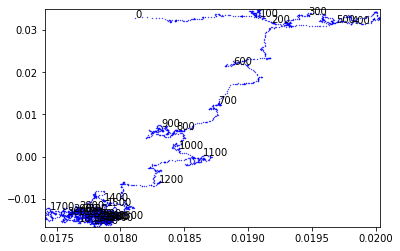

In [9]:
fig, ax = plt.subplots()
ax.scatter(c[:,0],c[:,1], marker=".", c='b', s=0.5)
ax.set_xlim(min(c[:,0]), max(c[:,0]))
ax.set_ylim(min(c[:,1]), max(c[:,1]))
for i in range(0,x,step):
    ax.annotate(str(i),(c[i,0],c[i,1]))
plt.show()

In [10]:
mds = MDTrSampler(y, n_dim = 2, conv_size = 5, n_samples=20, batch_size=10, manifold_size=64)

nmpsdm, psddu, prob_dist = mds.traj_char(c,s)     

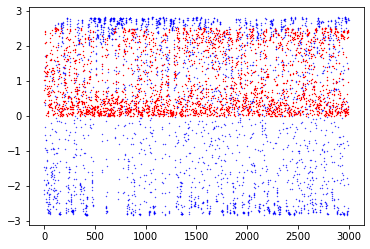

In [11]:
fig_b, ax_b = plt.subplots()
ax_b.scatter(range(0,nmpsdm.shape[0]),nmpsdm[:,0], marker=".", c="b", s=0.5)
ax_b.scatter(range(0,psddu.shape[0]),psddu[:],marker="x", c="r", s=0.2)
plt.show()

In [12]:
sampling_rate = 0.1
target, time_stamps = mds.batch_sampling(d.coordinates)

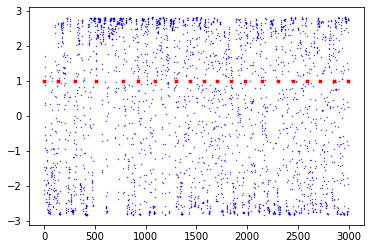

In [13]:
fig_c, ax_c = plt.subplots()
ax_c.scatter(range(0,nmpsdm.shape[0]),nmpsdm[:,0], marker=".", c="b", s=0.5)
ax_c.scatter(time_stamps, np.ones(time_stamps.shape),marker="x",c="r", s=10.0)
plt.show()

In [14]:
mds2 = MDTrSampler(y, n_dim = 2, conv_size = 5, n_samples=10, batch_size=10, manifold_size=9)
for i in range(x):
    mds2.adaptive_sampling_step(d.coordinates[i,:,:])


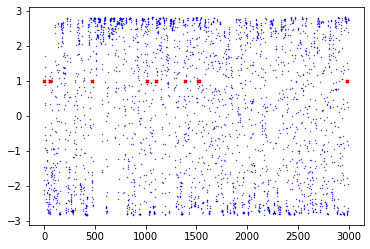

In [15]:
adaptive_samples = sorted([ mds2.strm_smplr.reservoir[i][1][0] for i in range(10)])
fig_d, ax_d = plt.subplots()
ax_d.scatter(range(0,nmpsdm.shape[0]),nmpsdm[:,0], marker=".", c="b", s=0.5)
ax_d.scatter(adaptive_samples, np.ones(len(adaptive_samples)),marker="x",c="r", s=10.0)
plt.show()

In [16]:
pprint(adaptive_samples)

[0, 57, 61, 468, 1017, 1101, 1384, 1516, 1526, 2982]


In [17]:
pprint(time_stamps)

array([   0.,  134.,  306.,  506.,  781.,  920., 1097., 1304., 1441.,
       1580., 1705., 1837., 1980., 2147., 2307., 2454., 2587., 2717.,
       2855., 2999.])
